In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [220]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Passenger Id e dados duplicados

In [222]:
# PassengerId nao acrescenta informacoes ao nosso dataset
# portanto vamos coloca-la como o index do dataset
def trataColunaPassengerId(df):
    return df.set_index("PassengerId")

train_df = trataColunaPassengerId(train_df)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
# Checar se ha duplicados
train_df.drop_duplicates(ignore_index=True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Survived

In [224]:
# Checa se os valores estao conforme esperados
train_df["Survived"].unique()

array([0, 1])

## Pclass
Esse atributo representa a classe do tiquete do passageiro, com:
* 1 - Primeira classe;
* 2 - Segunda classe;
* 3 - Terceira classe. 


In [225]:
train_df["Pclass"].unique()

array([3, 1, 2])

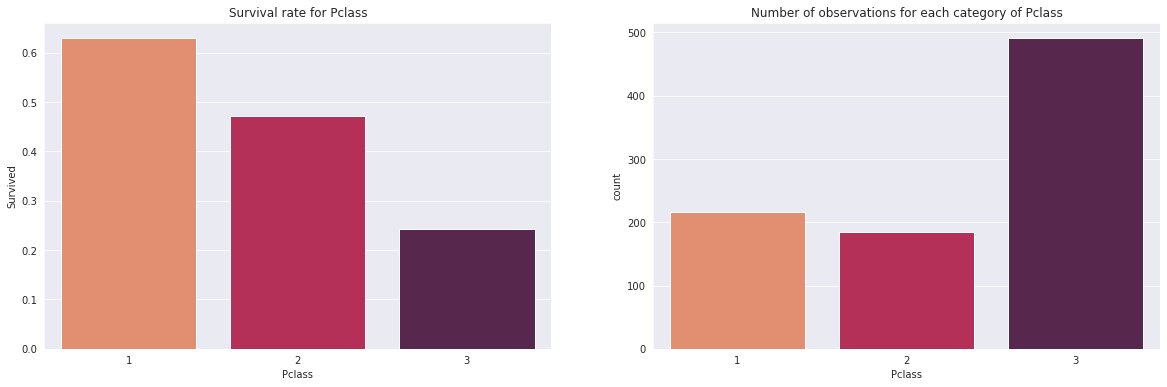

In [226]:
def grafico_de_barras_sobrevivencia(df, column, title = ""):
    """
    Funcao que plota um grafico para a taxa de sobrevivencia 
    de acordo com a coluna categorica passada
    """
    taxa_grupos = df.groupby(column)[["Survived"]].mean()
    
    fig, ax = plt.subplots(ncols = 2,figsize = (20,6)) 
    sns.barplot(x=taxa_grupos.index, y = taxa_grupos["Survived"], palette = "rocket_r", ax=ax[0], order = taxa_grupos.index.sort_values())
    sns.countplot(x=df[column], palette = "rocket_r", ax=ax[1], order = taxa_grupos.index.sort_values())
    ax[0].set_title("Survival rate for "+ column+title)
    ax[1].set_title("Number of observations for each category of "+ column+title)
    return 

grafico_de_barras_sobrevivencia(train_df, "Pclass")

Pode se notar que a classe do passageiro influe fortemente sobre a taxa de sobrevivencia. Isso acaba indicando que passageiros provenientes de maiores classes sociais foram privilegiados na hora do embarque

## Sex

In [227]:
# Analise simples
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

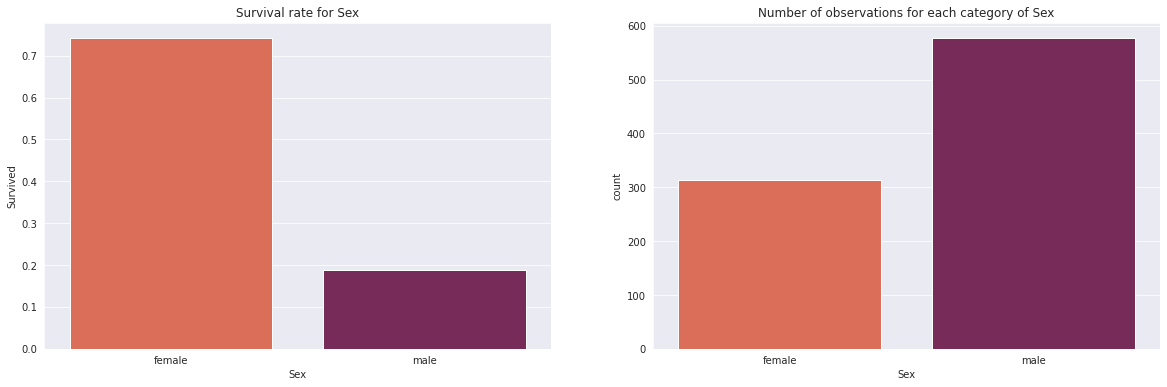

In [228]:
grafico_de_barras_sobrevivencia(train_df, "Sex")

Pode-se notar que as mulheres apresentaram uma maior taxa de sobrevivencia quando comparado aos homens. Isso indica que durante o embarque nos botes elas tinham preferencia.

## Age
Para o atributo da idade, ja foi possivel perceber que ele apresenta alguns valores nulos. Para isso vamos primeiro analisar a distribuicao dos valores nao nulos e substituir os valores nulos por uma distribuicao normal com media e variancia adequadas

In [229]:
train_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [230]:
def trataColunaAge(train, test = None,  is_test = False):
    """
    Função que realiza o tratamento dos dados para a coluna Age,

    """
    return_df = None
    
    mean_age = train["Age"].mean()
    std_age  = train["Age"].std()

    if(is_test):
        test_age_nan = test[test["Age"].isna()]["Age"]
        n = test_age_nan.size
        age_missing_values = np.random.normal(mean_age, std_age, n)
        age_missing_values[age_missing_values < 0] = 0
        test.loc[test["Age"].isna(), "Age"] = age_missing_values
        return_df = test
    else:
        train_age_nan = train[train["Age"].isna()]["Age"]
        n = train_age_nan.size
        age_missing_values = np.random.normal(mean_age, std_age, n)
        age_missing_values[age_missing_values < 0] = 0
        train.loc[train["Age"].isna(), "Age"] = age_missing_values
        return_df = train

    return return_df

# Replace NaNs in Age with a normal distribution
train_df = trataColunaAge(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


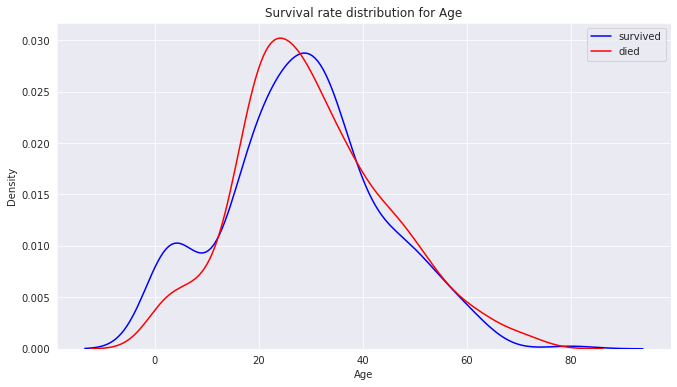

In [231]:
def displot_sobrevivencia(df, column, title = ""):
    """
    Funcao que plota um grafico para a distribuicao da
    taxa de sobrevivencia de acordo com a coluna numerica passada
    """
    fig, ax = plt.subplots(figsize = (11,6))
    
    sns.kdeplot(data = df[df["Survived"]==1], x=column, ax = ax, label = "survived", color = "blue")
    sns.kdeplot(data = df[df["Survived"]==0], x=column, ax = ax, label = "died", color = "red")
    ax.legend()
    
    ax.set_title("Survival rate distribution for "+ column + title)
    return 
displot_sobrevivencia(train_df, "Age")

Percebe-se que a distribuicao das idades para os sobreviventes apresenta uma maior concentracao para a idade de criancas, demonstrando que houve uma certa preferencia para esse grupo no embarque. 

## SibSp
Essa coluna indica a quantidade de Siblings (irmaos ou irmas) e Spouse (marido ou esposa) que a pessoas possui e que também estavam a bordo do navio 

In [232]:
train_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

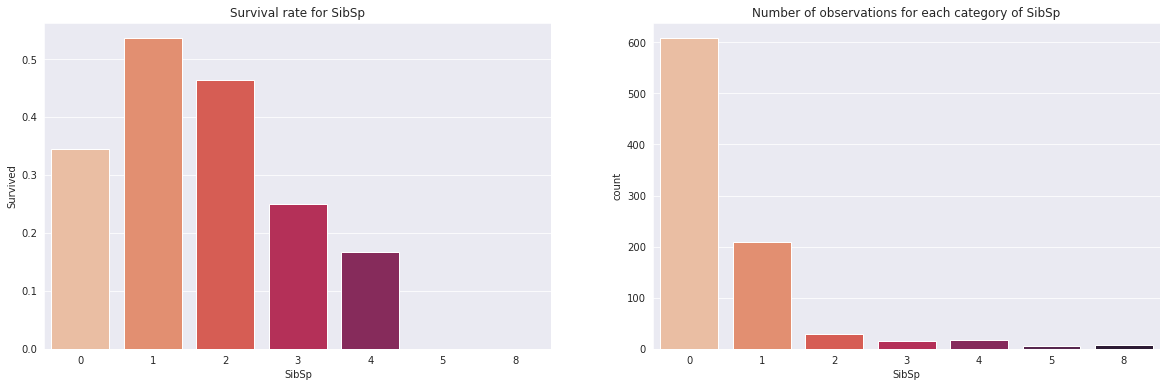

In [233]:
grafico_de_barras_sobrevivencia(train_df, "SibSp")

A partir do gráfico, percebe-se que a maioria das pessoas apresenta SibSp de 0 ou 1. Para os demais valores de SibSp há poucas observações, o que não nos permite concluir muito sobre. Para entender melhor o gráfico acima, vamos ver qual a influência da "coluna" Sex na taxa de sobrevivência de cada grupo 

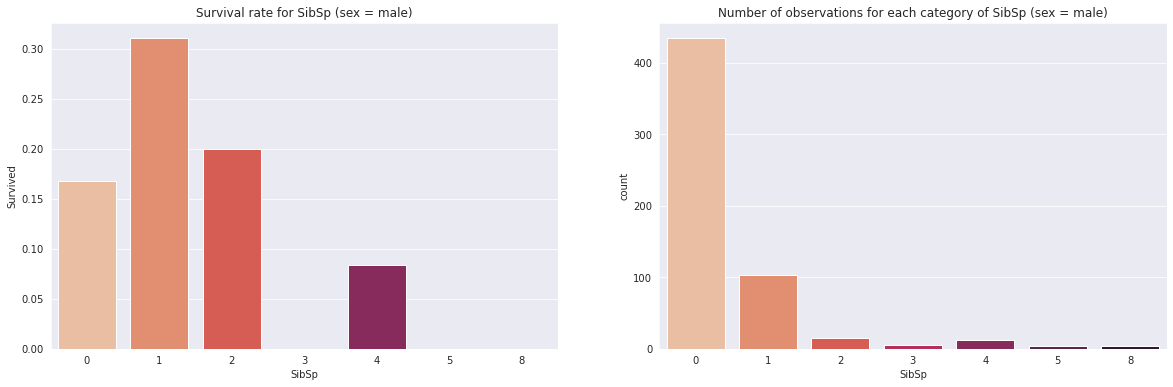

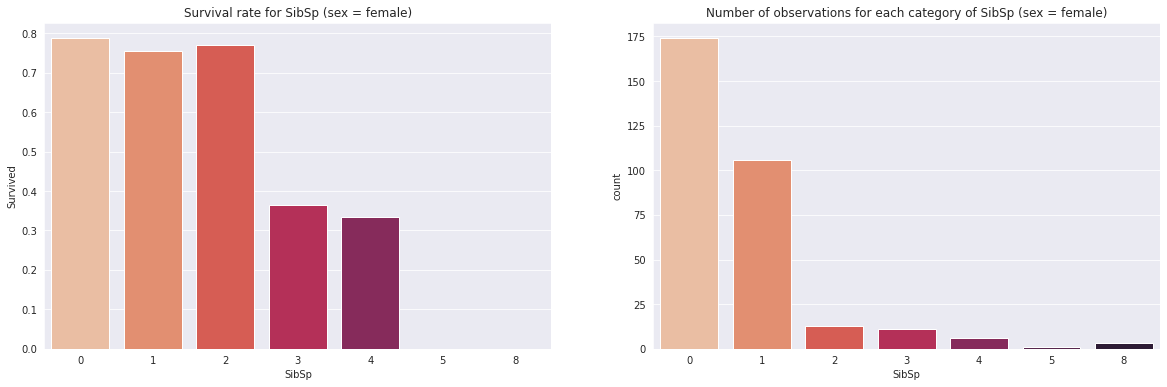

In [234]:
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "male"], "SibSp", title = " (sex = male)")
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "female"], "SibSp", title = " (sex = female)")

Desses gráficos pode-se notar que para os homens, apresentar um SibSp de 1 aumentou consideravelmente a taxa de sobrevivência, enquanto que para as mulheres, não houve muita alteração para a taxa de sobrevivência em função desse valor(os valores obtidos para as categorias 2, 3, 4, 5 e 8 podem ser desconsiderados pois há poucas observações).

Como há poucas observações para SibSp >3, vamos juntar substituir todos os valores > 3 por 3.

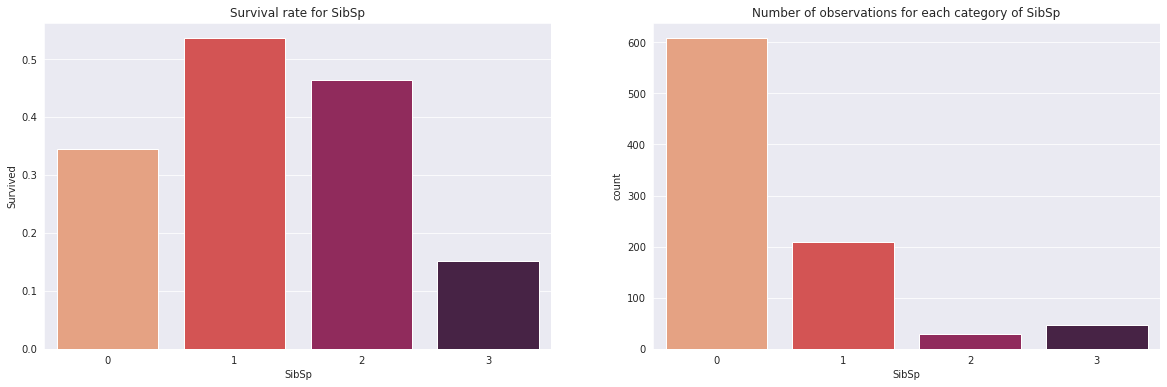

In [235]:
def trataColunaSibSp(df):
    df.loc[df["SibSp"]>3, "SibSp"] = 3
    return df

train_df = trataColunaSibSp(train_df)
grafico_de_barras_sobrevivencia(train_df, "SibSp")

## Parch
Essa coluna representa o número de parents (pai ou mãe) e children (filhos) que a pessoa possui e que também estavam a bordo do titanic

In [236]:
train_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

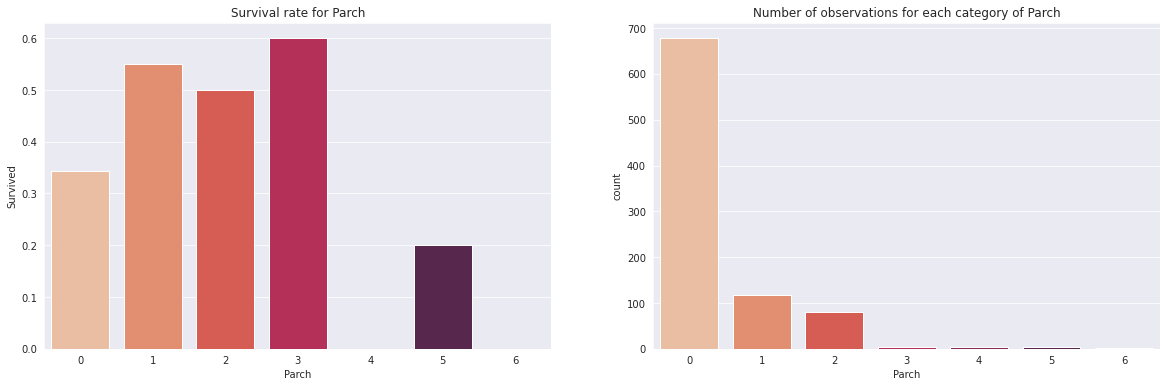

In [237]:
grafico_de_barras_sobrevivencia(train_df, "Parch")

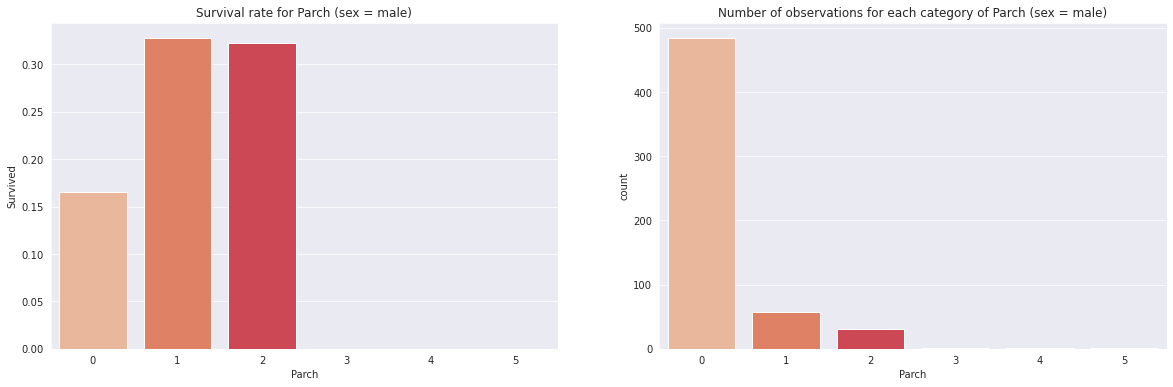

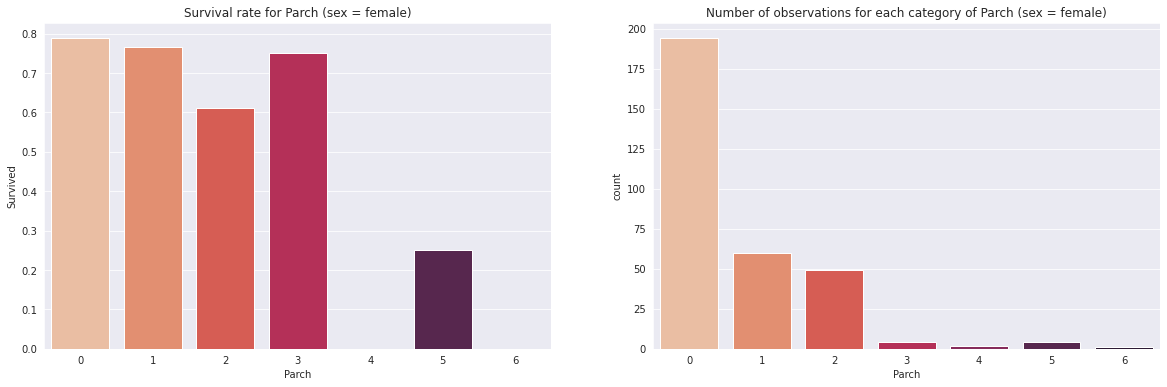

In [238]:
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "male"], "Parch", title = " (sex = male)")
grafico_de_barras_sobrevivencia(train_df[train_df["Sex"] == "female"], "Parch", title = " (sex = female)")

O resultado obtido é muito similar ao anterior. Nota-se que para as mulheres, o valor de Parch teve baixo impacto na taxa de sobrevivência, enquanto que para os homens, um Parch de 1 ou 2, praticamente dobrou a suas chances de sobreviver. Uma possível razão para isso, é que os homens que apresentavam mae ou filhas a bordo acabaram acompanhando elas nos botes salva-vidas. Portanto, algumas colunas que poderiam ajudar na nossa análise e corroborar a nossa tese são as seguintes: has_wife, has_daughter, has_mother e has_sister. No entanto é difícil obter esses dados a partir do dataset. 

Vamos fazer algo similar ao realizado para a coluna anterior. Vamos substituir os valores >3 por 3

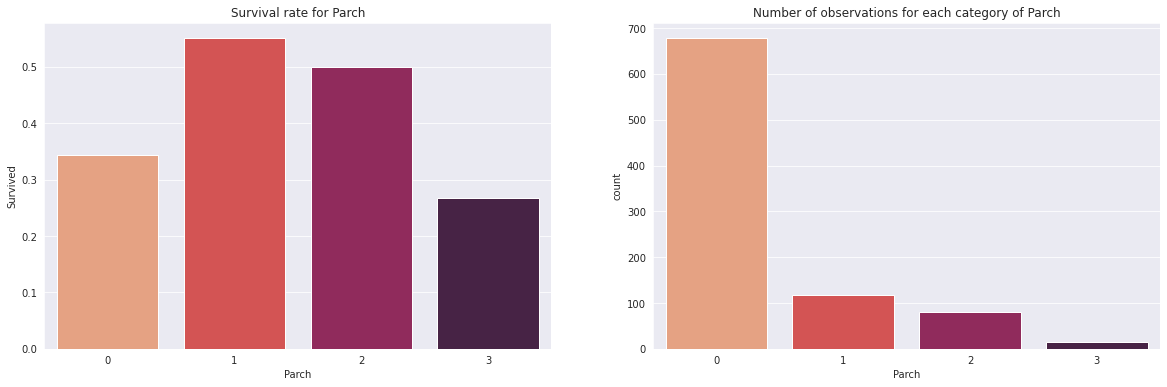

In [239]:
def trataColunaParch(df):
    df.loc[df["Parch"]>3, "Parch"] = 3
    return df

train_df = trataColunaParch(train_df)
grafico_de_barras_sobrevivencia(train_df, "Parch")

## Fare
Valor da passagem paga pela pessoa

In [240]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

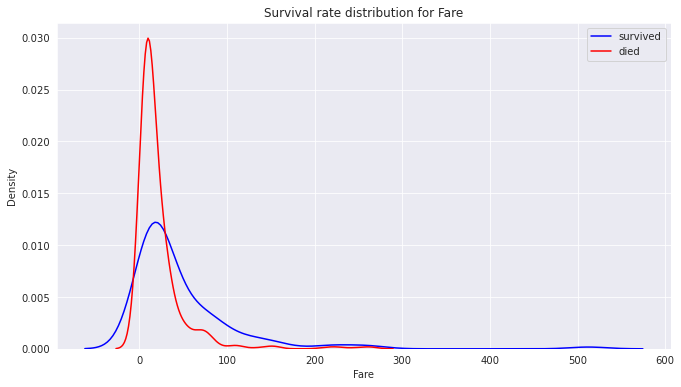

In [241]:
displot_sobrevivencia(train_df, "Fare")

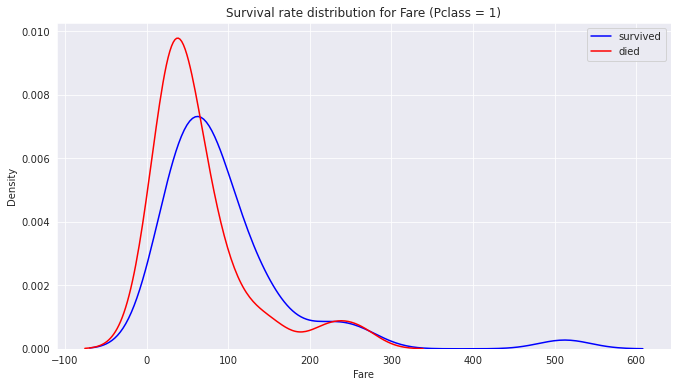

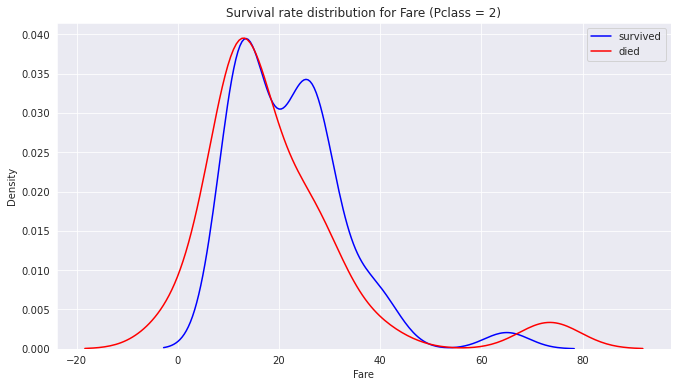

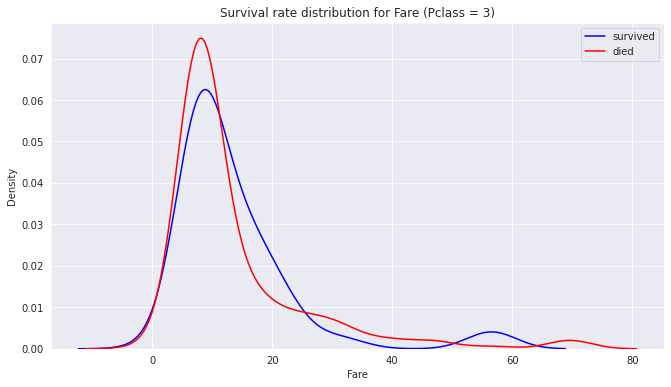

In [242]:
displot_sobrevivencia(train_df[train_df["Pclass"]==1], "Fare", title = " (Pclass = 1)")
displot_sobrevivencia(train_df[train_df["Pclass"]==2], "Fare", title = " (Pclass = 2)")
displot_sobrevivencia(train_df[train_df["Pclass"]==3], "Fare", title = " (Pclass = 3)")

A partir dos gráficos acima, pode-se notar que o valor paga na tarifa depende fortemente da classe do passageiro. Portanto, para evitar repassar informação repetida para o modelo, vamos substituir a coluna "Fare" por uma nova coluna "NormalFare". Nessa nova coluna, para cada classe, vamos tomar a média e o desvio padrão das tarifas e consideraremos a distribuição de "Fare" como sendo uma normal para as tres classes. Com isso a coluna "NormalFare" indicará o quanto a tarifa paga por aquela pessoa se diferenciou das demais pessoas da sua classe. 

In [243]:
def trataColunaFare(train, test = None, is_test = False):

    std_group   = train.groupby("Pclass")["Fare"].std()
    mean_group  = train.groupby("Pclass")["Fare"].mean()
    
    if is_test:
        test["Fare"].fillna(train["Fare"].mean(), inplace = True)
        std_df      = std_group[test["Pclass"]]
        mean_df     = mean_group[test["Pclass"]] 
        test["NormalFare"] = (test["Fare"] - mean_df.values)/std_df.values
        return test
    else: 
        train["Fare"].fillna(train["Fare"].mean(), inplace = True)
        std_df      = std_group[train["Pclass"]]
        mean_df     = mean_group[train["Pclass"]] 
        train["NormalFare"] = (train["Fare"] - mean_df.values)/std_df.values
        return train

train_df = trataColunaFare(train = train_df)
train_df["NormalFare"].describe()

count    8.910000e+02
mean     5.731791e-17
std      9.988758e-01
min     -1.539954e+00
25%     -5.455487e-01
50%     -4.475536e-01
75%      2.527764e-01
max      5.462777e+00
Name: NormalFare, dtype: float64

## NormalFare

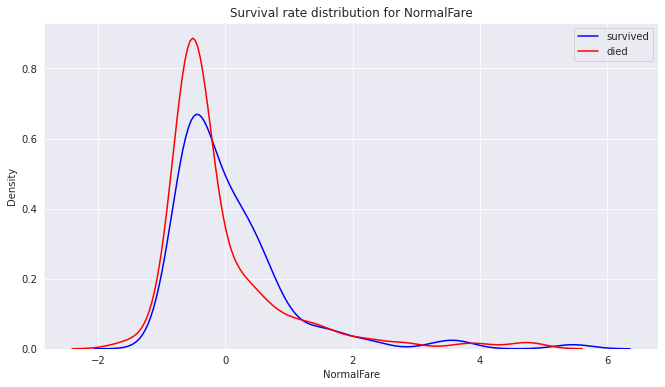

In [244]:
displot_sobrevivencia(train_df, "NormalFare")

## Cabin, Name, Ticket
Essas colunas indicam respectivamente: o número da cabine do passageiro, o nome do passageiro e o tíquete do passageiro. De maneira simples, não se pode extrair muitas informações delas, portanto vamos dropá-las.

In [245]:
def trataColunasCNT(df):
    df = df.drop(["Cabin", "Name", "Ticket"], axis =1)
    return df

train_df = trataColunasCNT(train_df)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NormalFare
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S,-0.545549
2,1,1,female,38.000000,1,0,71.2833,C,-0.164217
3,1,3,female,26.000000,0,0,7.9250,S,-0.488239
4,1,1,female,35.000000,1,0,53.1000,S,-0.396205
5,0,3,male,35.000000,0,0,8.0500,S,-0.477626
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S,-0.571063
888,1,1,female,19.000000,0,0,30.0000,S,-0.690922
889,0,3,female,53.398391,1,2,23.4500,S,0.829880


## Embarked
Essa coluna indica o lugar que o passageiro embarcou. Ela apresenta os seguintes valores:
* C = Cherbourg;
* Q = Queenstown;
* S = Southampton.

Como ela apresenta apenas dois valores desconhecidos, vamos analisar o impacto da coluna as informações que a coluna pode acrescentar para depois decidir o que fazer com os NaN's.

In [246]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

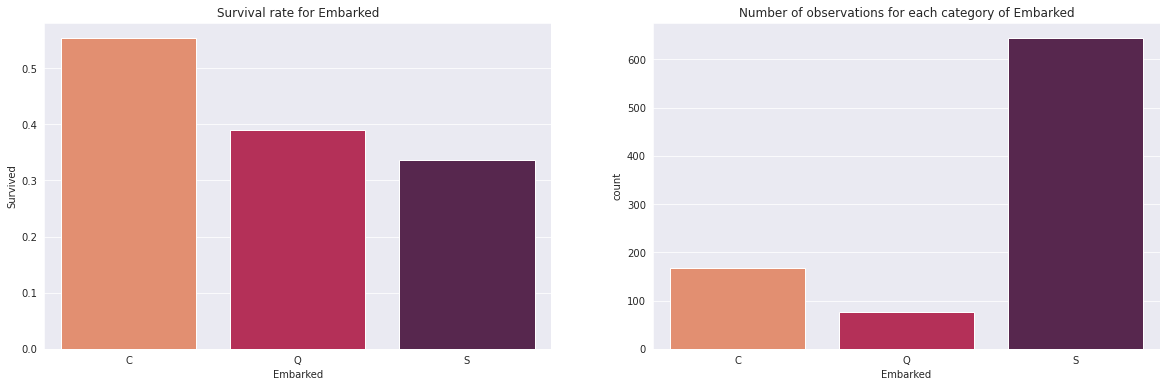

In [247]:
grafico_de_barras_sobrevivencia(train_df, "Embarked")

Pode-se notar, que o local de embarque apresenta uma certa influência sobre a taxa de sobrevivência. Por fim, vamos substituir os NaN's pela moda.

In [248]:
def trataColunaEmbarked(train, test=None, is_test=False):
    mode = train["Embarked"].mode().values[0]

    if is_test:
        test["Embarked"].fillna(mode, inplace = True)
        return test
    else:
        train["Embarked"].fillna(mode, inplace = True)
        return train

train_df = trataColunaEmbarked(train=train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   NormalFare  891 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 101.9+ KB


## Mais alguns gráficos

## Tratamento dos dados de teste
Devemos aplicar os mesmos tratamentos para os dados de teste

In [249]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [250]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [251]:
test_df = trataColunaPassengerId(test_df)
test_df = trataColunaAge(train= train_df, test= test_df, is_test=True)
test_df = trataColunaEmbarked(train=train_df, test=test_df, is_test=True)
test_df = trataColunaFare(train=train_df, test=test_df, is_test=True)
test_df = trataColunaParch(test_df)
test_df = trataColunasCNT(test_df)
test_df = trataColunaSibSp(test_df)

In [252]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked    418 non-null    object 
 7   NormalFare  418 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 29.4+ KB


In [253]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NormalFare
PassengerId,,,,,,,,
892,3,male,34.500000,0,0,7.8292,Q,-0.496373
893,3,female,47.000000,1,0,7.0000,S,-0.566774
894,2,male,62.000000,0,0,9.6875,Q,-0.817944
895,3,male,27.000000,0,0,8.6625,S,-0.425623
896,3,female,22.000000,1,1,12.2875,S,-0.117850
...,...,...,...,...,...,...,...,...
1305,3,male,21.299119,0,0,8.0500,S,-0.477626
1306,1,female,39.000000,0,0,108.9000,C,0.315708
1307,3,male,38.500000,0,0,7.2500,S,-0.545549
